In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.drop(columns=['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [7]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.Age.min()

18

In [9]:
data.Age.max()

92

In [10]:
labels=['0-20','21-40','41-60','Above 61']
bins=[0,21,41,61,100]
data['Age_bins']=pd.cut(data.Age,bins,labels=labels,include_lowest=True)

In [11]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,21-40
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [13]:
data[['Age','Age_bins']].to_csv('test.csv')

In [14]:
from google.colab import files
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
data.Age_bins.value_counts()

,count
Age_bins,
21-40,6643
41-60,2804
Above 61,411
0-20,142


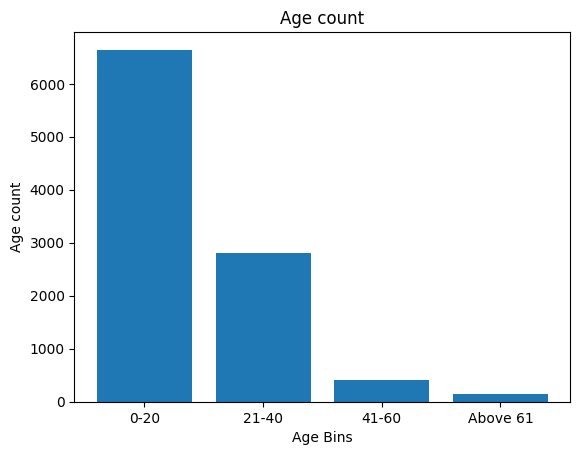

In [20]:
# making the bar chart
plt.bar(labels,data.Age_bins.value_counts())
plt.title('Age count')
plt.xlabel('Age Bins')
plt.ylabel('Age count')
plt.show()

In [17]:
def add_label(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])